# Homework3

## Task: 
Pick up a dataset from: https://github.com/awesomedata/awesome-public-datasets<br>
Do data process on it.

## The dataset:
Titanic dataset: https://www.kaggle.com/c/titanic/data<br>

## Variables in the dataset

|Variables|Definition|Key|
|-|-|-|
|Survival|Survival|0 = No, 1 = Yes|
|Pclass|Ticket class|1 = 1st, 2 = 2nd, 3 = 3rd|
|Sex|Sex| |
|Age|Age in years| |
|Sibsp|# of siblings/spouses abroad the Titanic| |
|Parch|# of parents/children abroad the Titanic| |
|Ticket|ticket number| |
|Fare|Passenger fare| |
|Cabin|Cabin number| |
|Embarked|Port of Embarkation|C = Cherbourg, Q = Queenstown, S = Southampton|

## What we need to check
- Duplicated rows
- Missing Values
- Outliers
- Multiple Value Ranges
- Non-numerical Data

## Import and get to know the data

In [49]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
path = Path("../data/train.csv")

In [134]:
original_df = pd.read_csv(str(path), index_col=["PassengerId"])
original_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [26]:
original_df.shape

(891, 11)

In [21]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


## Duplicated rows
Check if there are any duplicated rows in the data frame.

In [22]:
def check_duplicated(df):
    """
    Check if there are any duplicated rows.
    If so, print them.
    Returns a new DataFrame which doesn't have any duplicated rows.
    
    Parameters
    ----------------
    df: Pandas DataFrame
    Could contain duplicated rows.
    
    Return
    ---------
    removed_df: Pandas DataFrame
    A Pandas dataFrame which doesn't have any duplicated rows.
    """
    for i, x in enumerate(df.duplicated()):
        if x == True:
            print(df.iloc[i])
    removed_df = df.drop_duplicates()
    return removed_df

In [23]:
df = check_duplicated(original_df)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Missing Values
Check if there are any columns that have missing values.

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [38]:
df.columns[df.isnull().any().tolist()]

Index(['Age', 'Cabin', 'Embarked'], dtype='object')

### Columns that have missing values
There are three columns which have missing values.
- Age
- Cabin
- Embarked

### Print some examples of rows that have a missing value in Column Age or Column.

#### Age:

In [40]:
df[df["Age"].isnull()].head()  # Examples of rows that doesn't have the value in Age column.

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q


In [45]:
print("The number of missing values in Age column is: {}".format(df["Age"].isnull().sum()))

The number of missing values in Age column is: 177


#### Cabin:

In [41]:
df[df["Cabin"].isnull()].head()  # Examples of rows that doesn't have the value in Cabin column.

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [46]:
print("The number of missing values in Cabin column is: {}".format(df["Cabin"].isnull().sum()))

The number of missing values in Cabin column is: 687


#### Embarked:

In [43]:
df[df["Embarked"].isnull()].head()  # Examples of rows that doesn't have the value in Cabin column.

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [47]:
print("The number of missing values in Embarked column is: {}".format(df["Embarked"].isnull().sum()))

The number of missing values in Embarked column is: 2


## How are we going to tackle these missing calues

### 1. Age column
**My thought:**
- Think about the variables that might have a correlation with Age.
    - `Survived` should be correlated with Age.
    - `Pclass` could be correlated with Age.
    - If the columns above two don't have any correlation with Age, we need to look into other variables.

Let's take a look at correlation betweel columns which has numerical values.

In [62]:
df.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


**What we can say from this correlation table**
- Actually no correlation between `Survived` and `Age`, surprisingly.
- There is a correlation between `Pclass` and `Age`. But why is it negative?
    - **Because Pclass: 1 = 1st, 2 = 2nd, 3 = 3rd. We need to fix this to 1 = 3rd, 2 = 2nd, 3 = 1st**, which I will fix later.
- We can see the correlation between `Pclass` and `Fare`. Why negative?
    - The same reason as above
- The number of siblings seems a little bit related to `Age`. 
    - Means that younger people have more siblings than older people.

**Solution**

`Pclass` has the biggest absolute value of correlation with `Age`.
So what I am going to do is take the average of each `Pclass` and fill the values into blanks.

### 2. Cabin Column
Titanica: https://www.encyclopedia-titanica.org/titanic-deckplans/profile.html<br>
**Summary of this site**
- Boat desk is the top floar
- A, B desk seem for 1st class
- C, D deck seem for 2nd class
- E, F, G desk seem for 3rd class

**My thought:**
The location of the cabin might be important because access to boats depends on the location of cabins or the floor.
However I am going to remove `Cabin` column.

**Because**
- Again `Cabin` column is missing 678 values, which means 76.1% values are missing.
- My hypothesis is that location of cabin or the floor affects Machine Learning Model's performance. So if we fill in the missing values wrong way, model's performance goes bad. So for now, just get rid of the column in order to avoid making model's performance worse.

**Note**
If we could prove that the `Cabin` matters for model's performance, we need to fill in the blanks somehow.
To do so, need to think about how to prove that.

### 3. Embarked

In [135]:
df[df["Embarked"].isnull()].head()  # Examples of rows that doesn't have the value in Cabin column.

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [128]:
counts_emb = pd.value_counts(df["Embarked"]).tolist()
emb = df["Embarked"].unique().tolist()[:-1]
emb_dict = {
    "S": "Southampton",
    "C": "Cherbourg",
    "Q": "Queenstown"
}
emb = [emb_dict[x] for x in emb]

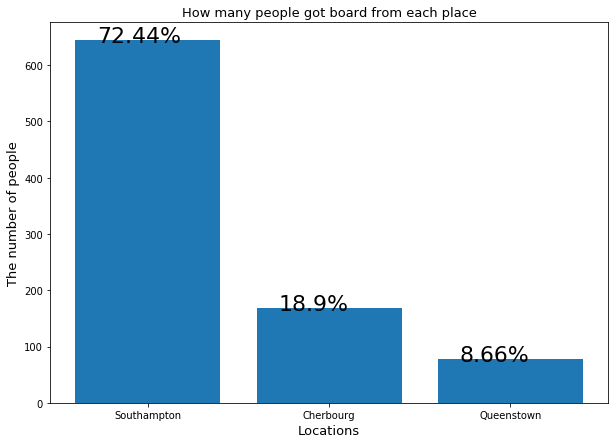

In [138]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)
ax.bar(emb, counts_emb)
ax.set_title("How many people got board from each place",
                 fontsize=13)
ax.set_xlabel("Locations", fontsize=13)
ax.set_ylabel("The number of people", fontsize=13)

totals = []
# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.12, i.get_height()-3, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=22,
                color='black')

**Solution**
I am going to fill the two blank with `S`, which is short for `Southampton`.

## Outliers
Before I am going to fill in the missing values, see if there are any outliers in each numerical column.

In [136]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


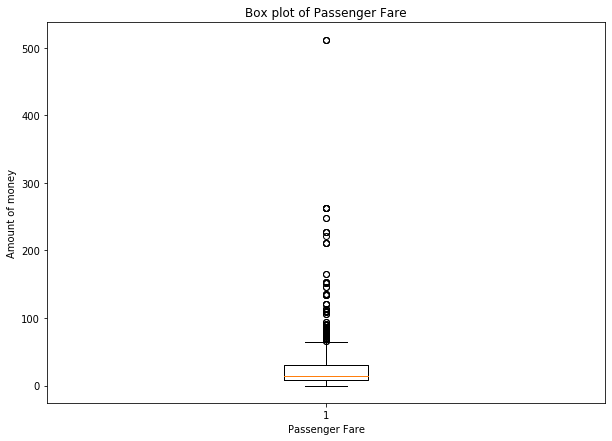

In [145]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)
ax.set_title("Box plot of Passenger Fare")
ax.set_xlabel("Passenger Fare")
ax.set_ylabel("Amount of money")
ax.boxplot(df["Fare"]);

Seems there is an outlier at the very top. Look into more detail of the value.

Here I define the outlier as `MEAN + 2 * STD`.

In [147]:
mean_fare = df["Fare"].mean()
std_fare = df["Fare"].std()
df[df["Fare"] > mean_fare + 2 * std_fare]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
28,0,1,"Fortune, Mr. Charles Alexander",male,19.00,3,2,19950,263.0000,C23 C25 C27,S
32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
89,1,1,"Fortune, Miss. Mabel Helen",female,23.00,3,2,19950,263.0000,C23 C25 C27,S
119,0,1,"Baxter, Mr. Quigg Edmond",male,24.00,0,1,PC 17558,247.5208,B58 B60,C
196,1,1,"Lurette, Miss. Elise",female,58.00,0,0,PC 17569,146.5208,B80,C
259,1,1,"Ward, Miss. Anna",female,35.00,0,0,PC 17755,512.3292,NaN,C
269,1,1,"Graham, Mrs. William Thompson (Edith Junkins)",female,58.00,0,1,PC 17582,153.4625,C125,S
270,1,1,"Bissette, Miss. Amelia",female,35.00,0,0,PC 17760,135.6333,C99,S
298,0,1,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S


Now I need to think about the definition of the outlier because there are outliers more than I expected.
In this table, most of them are under `300.0` so I am going to change the definition of the outlier to as `Fare` >= 300.

In [153]:
df[df["Fare"] > 300]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


<img width="532" alt="b_deck" src="https://user-images.githubusercontent.com/44624585/61585177-b539d680-ab0a-11e9-8793-e0e90f8a06ab.png">

**Solution**
- For `PassengerId: 680`: This family is staying in three rooms, `B51`, `B53`, and `55`, which seem to connect with each other. In addition, those three rooms have a private promenade. It must be expensive. So I just leave this fare there as a valid value instead of dealing with an outlier.<br><br>
- For `PassengerId 738`: The room `B101` is not big that much, and the person is on board just himself. Therefore I am going to deal with this value as an outlier. And the type of room is similar to `B102`. If there is a fare of `B102` in the dataset, I will use the value as the fare of this person. If not, I will take the average of fare of the rooms that are similar to `B101`.<br><br>
- For `PassengerId 259`: The information of this person is similar to `PassengerId 738`. So I am going to deal with this fare as an outlier and replace it to the same fare as `PassengerId 738's`.  

In [154]:
df[df["Cabin"] == "B102"]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
816,0,1,"Fry, Mr. Richard",male,NaN,0,0,112058,0.0,B102,S


OK, `B102` doesn't have fare.
And we need to pay attention to the rows whose fare is `0.0`.
Let's see how many rows there are.

In [158]:
df[df["Fare"] == 0]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S


Most cabins of the results table are empty except for `B94`, `A36`, `B102`.

<img width="283" alt="cabin94" src="https://user-images.githubusercontent.com/44624585/61585376-faf89e00-ab0e-11e9-8291-a4ad33ebb305.png">

In [165]:
df[df["Cabin"].str.startswith("B", na=False)]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0000,B28,NaN
119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
140,0,1,"Giglio, Mr. Victor",male,24.0,0,0,PC 17593,79.2000,B86,C
171,0,1,"Van der hoef, Mr. Wyckoff",male,61.0,0,0,111240,33.5000,B19,S
195,1,1,"Brown, Mrs. James Joseph (Margaret Tobin)",female,44.0,0,0,PC 17610,27.7208,B4,C
196,1,1,"Lurette, Miss. Elise",female,58.0,0,0,PC 17569,146.5208,B80,C
258,1,1,"Cherry, Miss. Gladys",female,30.0,0,0,110152,86.5000,B77,S


Need to do
1. Fill in the missing values
2. 